In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
!wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

--2023-06-14 17:42:07--  https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2023-06-14 17:42:08 (40.0 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


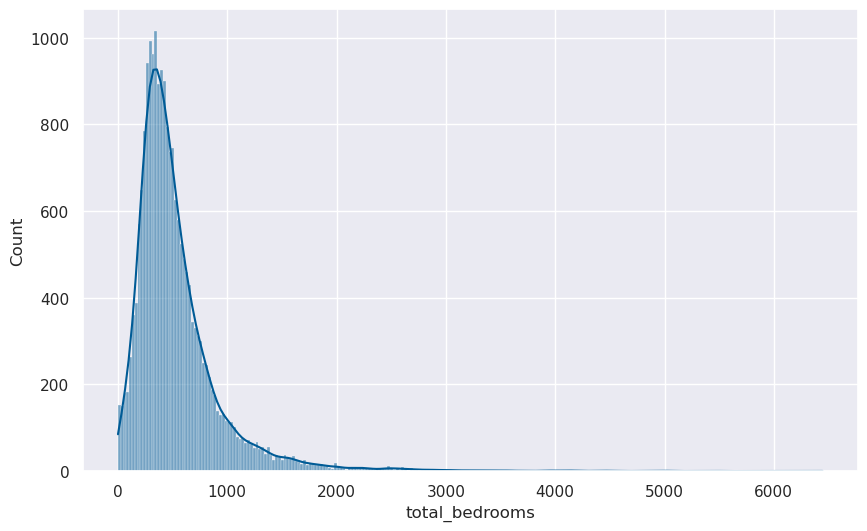

In [8]:
plt.figure(figsize= (10, 6))
sns.histplot(data['total_bedrooms'], color = '#005b96', kde= True);

In [9]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace= True)

# EDA

/tmp/ipykernel_20/3677142959.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True, cmap='YlGnBu')


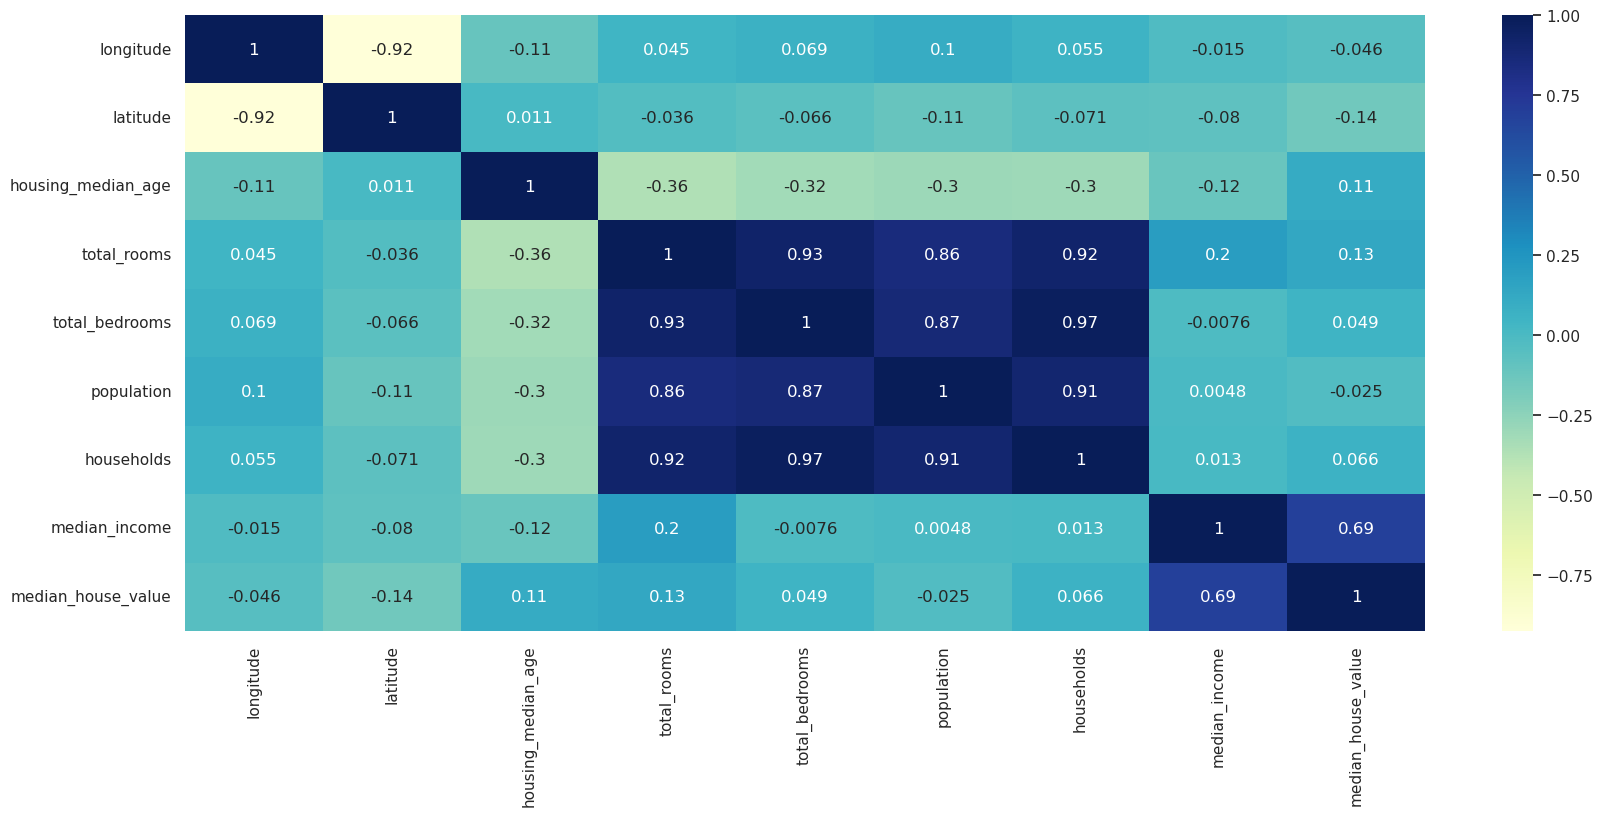

In [10]:
plt.figure(figsize= (20, 8))
sns.heatmap(data.corr(), annot= True, cmap='YlGnBu')
plt.show()

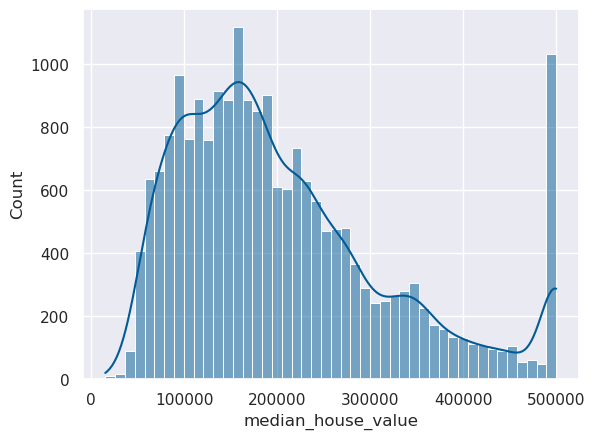

In [11]:
sns.histplot(data['median_house_value'], color = '#005b96', kde= True);


In [12]:
data['median_house_value'].skew()


0.9777632739098341

Our target variable is clearly skewed. Therefore we will apply log transformation to it later



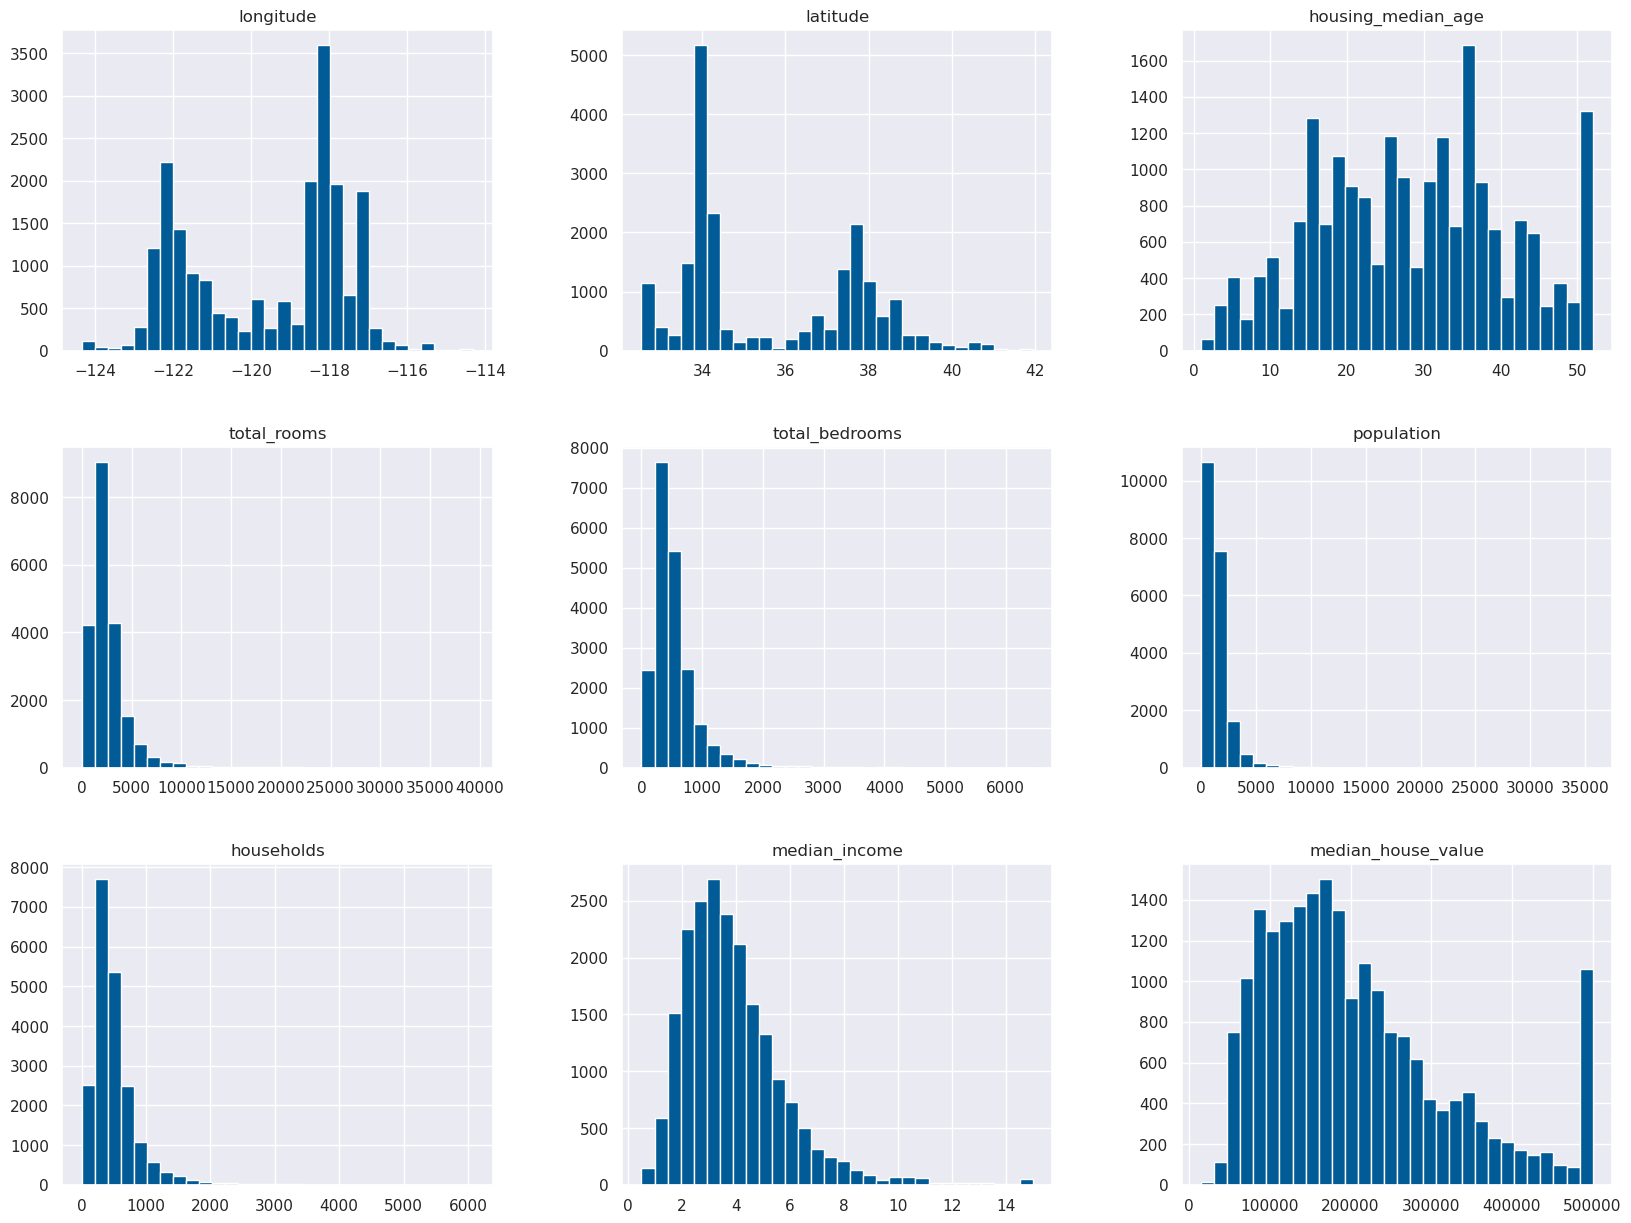

In [13]:
data.hist(bins = 30, figsize=(20, 15), color = '#005b96');


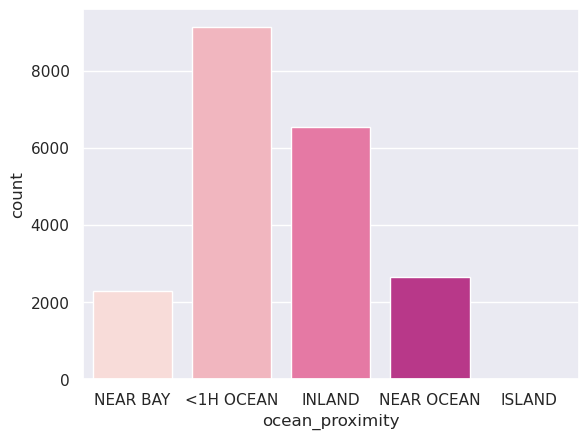

In [14]:
sns.countplot(x = data['ocean_proximity'], palette= 'RdPu');


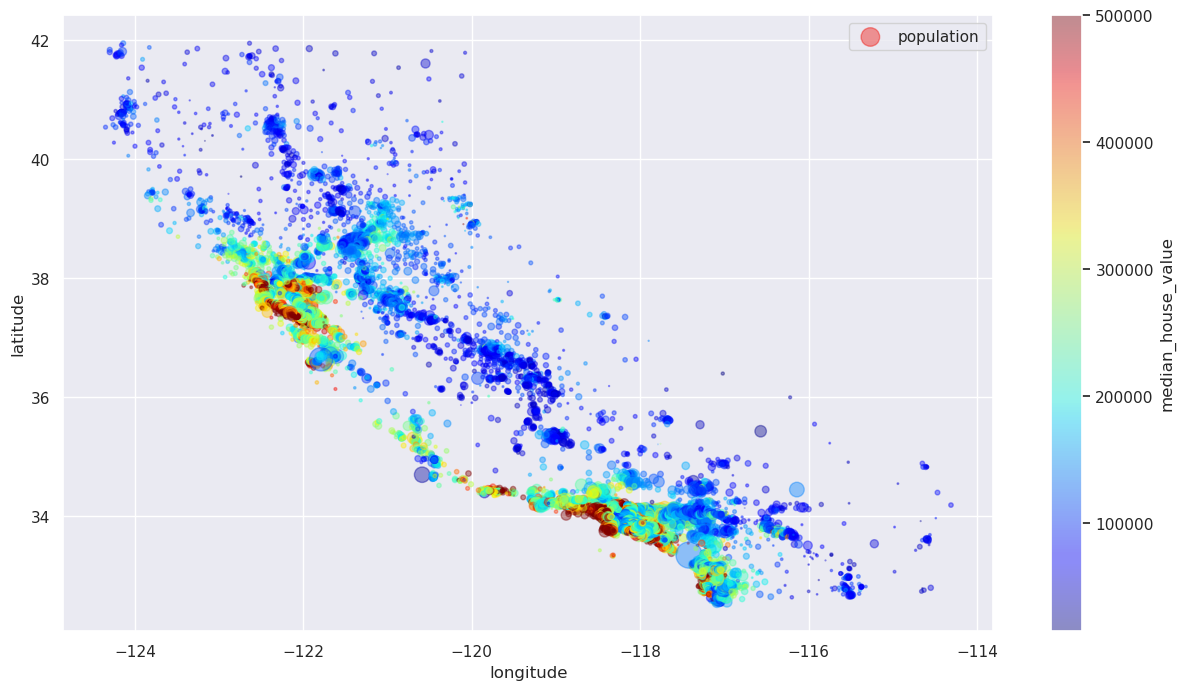

In [15]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=data["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()
plt.show()

# Feature ENGINEERING

In [16]:
data['bed_per_room'] = data['total_bedrooms'] / data['total_rooms']


In [17]:
X = data.drop(['median_house_value'], axis=1)
y = np.log(data.median_house_value) # Applying log transformation

In [18]:
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns= ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(X[feature]))
skew_df['Abs_Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.480888,3.480888,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,bed_per_room,6.316445,6.316445,True


In [19]:
skewed_columns = skew_df[skew_df['Abs_Skew'] > 0.5]['Feature'].values
skewed_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

In [20]:
for column in skewed_columns:
    X[column] = np.log(X[column])

In [21]:
encoder=LabelEncoder()
X['ocean_proximity']=encoder.fit_transform(X['ocean_proximity'])

In [22]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,3,-1.920110
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,3,-1.859204
2,-122.24,37.85,52.0,7.290975,5.247024,6.206576,5.176150,1.982022,3,-2.043951
3,-122.25,37.85,52.0,7.149917,5.459586,6.324359,5.389072,1.730434,3,-1.690331
4,-122.25,37.85,52.0,7.394493,5.634790,6.336826,5.556828,1.347086,3,-1.759704


In [23]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index= X.index, columns= X.columns)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


Linear Regression is a fundamental statistical modeling technique used to understand the relationship between a dependent variable and one or more independent variables. It aims to find the best-fit straight line that represents the linear relationship between the variables. Linear Regression is widely used for prediction, forecasting, and understanding the impact of variables on the target variable.

In Linear Regression, the dependent variable (also called the response variable or target variable) is predicted based on one or more independent variables (also called predictor variables or features). The relationship between the variables is assumed to be linear, meaning that the change in the dependent variable is proportional to the change in the independent variable(s).

The goal of Linear Regression is to estimate the coefficients of the line (slope and intercept) that minimize the difference between the predicted values and the actual values of the dependent variable. This is done using a technique called Ordinary Least Squares (OLS), which minimizes the sum of the squared differences between the predicted and actual values.

Once the coefficients are estimated, the linear equation can be used to make predictions on new data. The equation takes the form:
Y = b0 + b1X1 + b2X2 + ... + bn*Xn
where Y is the predicted value of the dependent variable, b0 is the intercept, b1, b2, ..., bn are the coefficients, and X1, X2, ..., Xn are the values of the independent variables.

Linear Regression has several assumptions, including linearity, independence of errors, homoscedasticity (constant variance of errors), and absence of multicollinearity (high correlation between independent variables). Violation of these assumptions can affect the accuracy and reliability of the model.

Linear Regression is widely used in various fields such as economics, social sciences, finance, and engineering. It serves as a basis for more advanced regression models and provides valuable insights into the relationships between variables.

Linear Regression is like drawing a straight line to predict something. Imagine you want to know how much you will weigh based on how tall you are. You can ask your friends who are different heights to weigh themselves, and then you draw a line that best fits their heights and weights. This line helps you predict how much you might weigh based on your own height.

In Linear Regression, we have a dependent variable (like weight) and one or more independent variables (like height). We want to find a straight line that best shows the relationship between them. The line should pass as close as possible to the points representing the actual weights of different people with different heights.

To find the line, we use a math trick called Ordinary Least Squares. This trick helps us find the line that minimizes the difference between the predicted weights and the actual weights. Once we have the line, we can use it to predict the weight of a person based on their height.

Linear Regression has some rules. It assumes that the relationship between the variables is a straight line. It also assumes that the errors (the differences between the predicted and actual weights) are random and have the same variability for all heights. It's also important that the heights of your friends are not very similar, otherwise, it can be tricky to draw an accurate line.

In summary, Linear Regression is a way to draw a straight line that helps us predict one variable based on another. It's like drawing a line through points to find a pattern. It's used in many fields to understand relationships between things and make predictions.

# Linear Regressor

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_lr))
r2 = r2_score(y_test, predictions_lr)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.34391059675751895
R-square: 0.6355916934937629


# KNN

In [27]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_knn))
r2 = r2_score(y_test, predictions_knn)

print('RMSE:', rmse)
print('R-square:', r2)

RMSE: 0.29601285396707333
R-square: 0.7300282680211423


# Random Forest Regressor

In [29]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

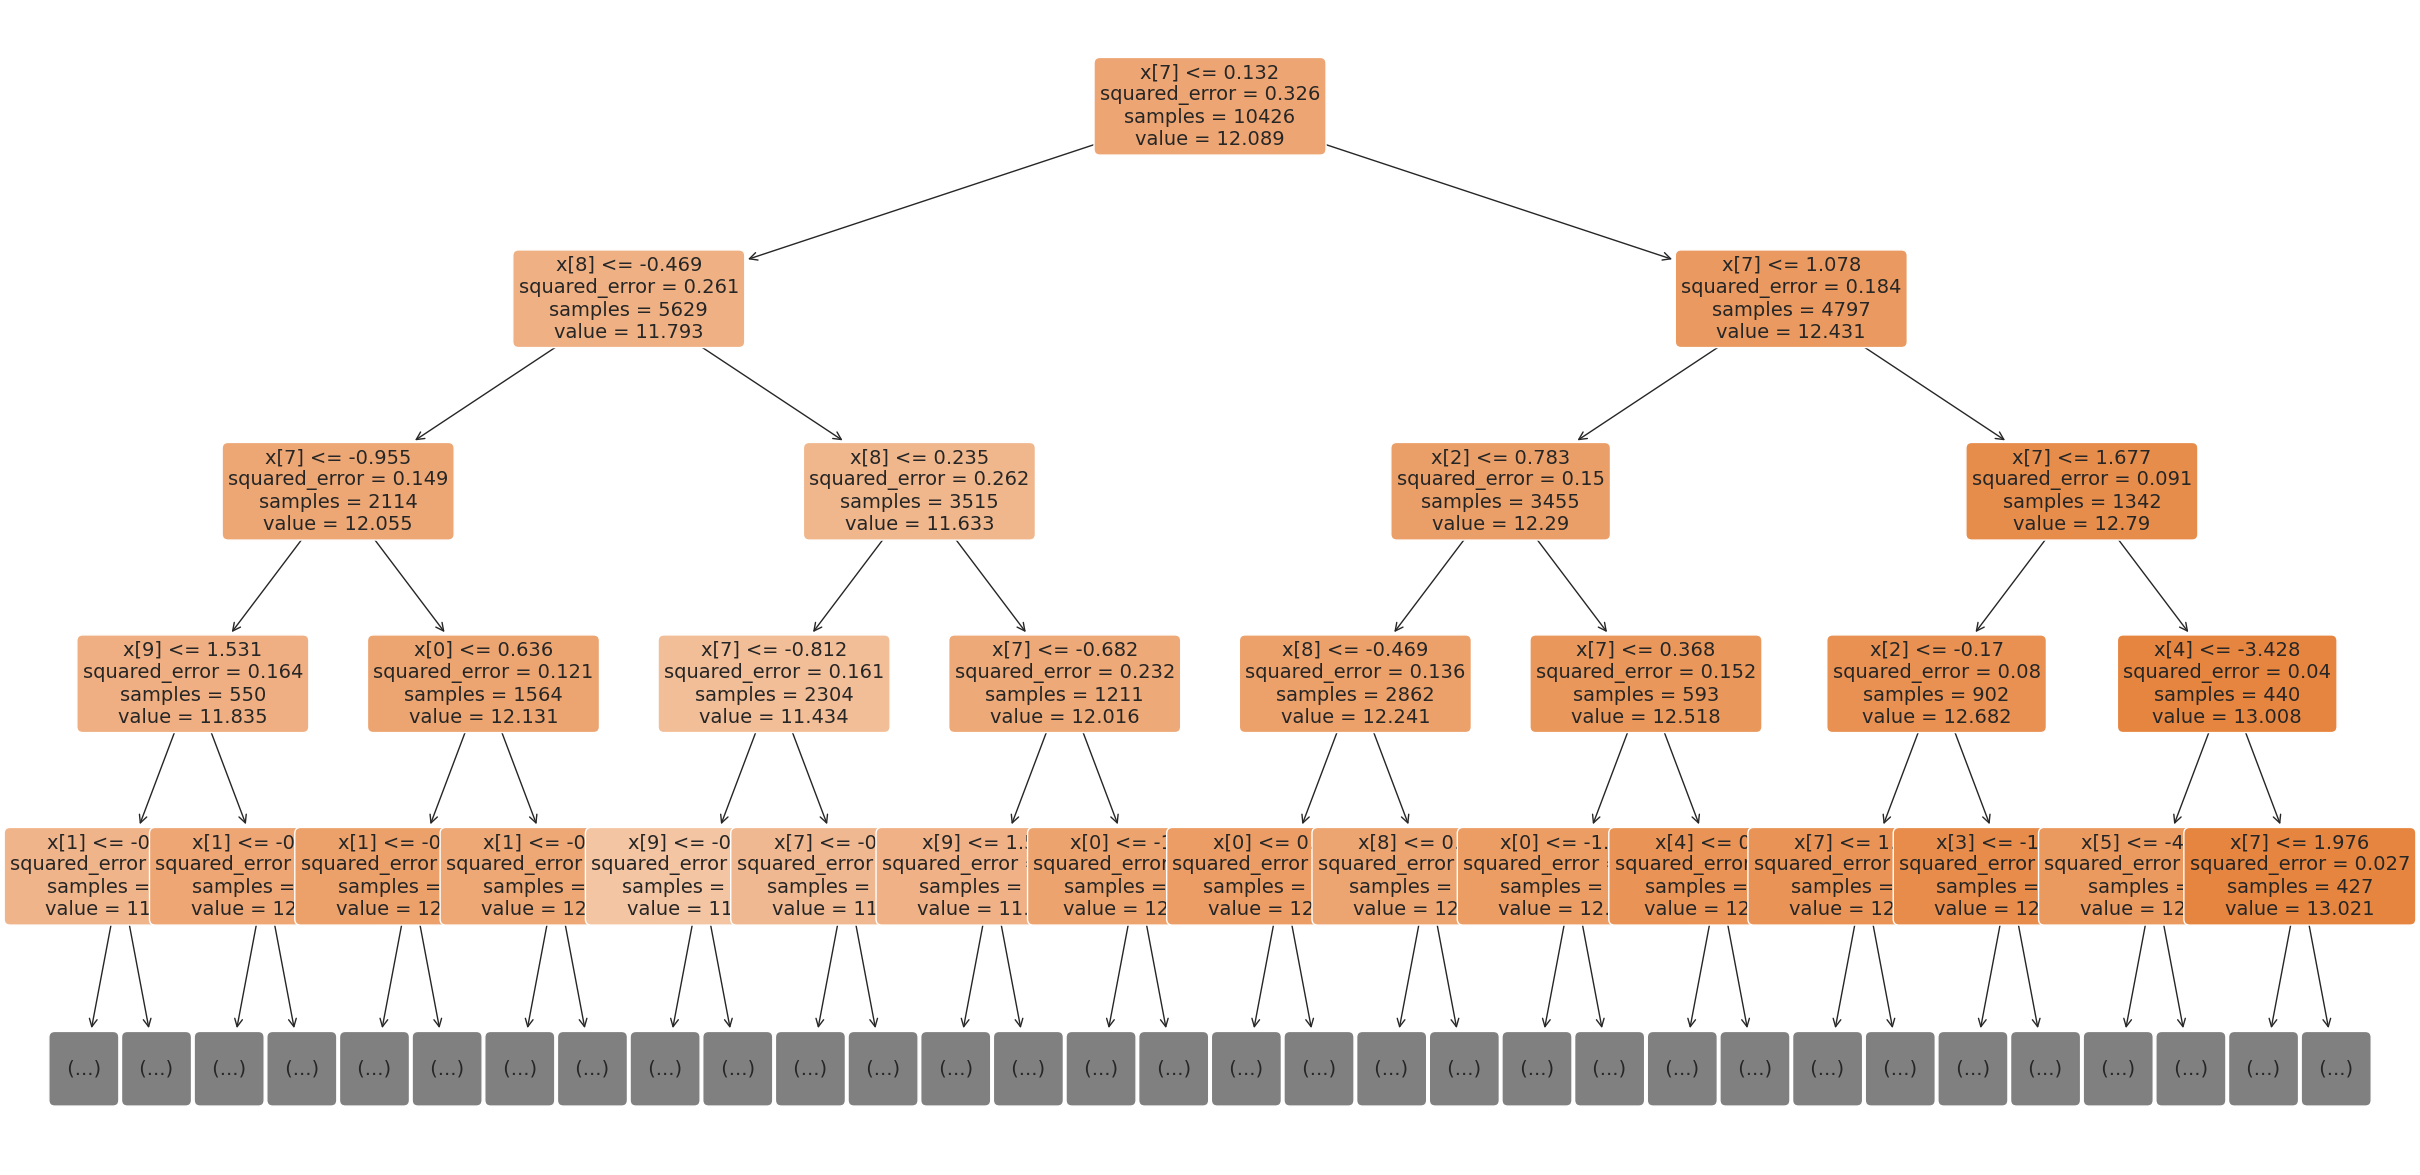

In [30]:
from sklearn.tree import plot_tree

tree = rf.estimators_[0]
# Plotting the first decision tree
plt.figure(figsize=(30, 15))
plot_tree(tree, filled=True, rounded=True, max_depth=4, fontsize=14)
plt.show()